# Implementacion de redes neuronales para predecir clasificacion de asteroides
Se realiza un modelo Secuencial, utilizando softmax como activacion en output, categorical crossentropy como funcion de perdida y 'sgd' como optimizador

In [1]:
# Pandas - Numpy - Seaborn - Matplotlib (import data, manipulation, graphication)
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Scikit-learn (train|test split, scaler)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# TensorFlow - Keras (Model, layers)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

### Modelo utilizando los datos generados por el Autoencoder

In [2]:
X_train_ae1 = pd.read_csv("Data/X_data_autoencoded1.csv") # Se obtiene el resultado del autoencoder para X_train
X_train_ae1 = X_train_ae1.to_numpy() # Se convierte a un arreglo de numpy

In [3]:
X_test_ae1 = pd.read_csv("Data/X_test_autoencoded1.csv") # Se obtiene el resultado del autoencoder para X_test
X_test_ae1 = X_test_ae1.to_numpy() # Se convierte a un arreglo de numpy

In [4]:
y_train = pd.read_csv("Data/y_train.csv").to_numpy() # Se llama los valores de "y train" asociados a los X en el autoencode.
y_test = pd.read_csv("Data/y_test.csv").to_numpy() # Se llama los valores de "y test" asociados a los X en el autoencode.

In [5]:
def get_model(input_shape): 
    model=Sequential([ # Se construye el modelo Secuencial
                  InputLayer(input_shape=input_shape), # Tamaño del input (100,)
                  Dense(units=500,activation='relu',name='layer_hidden1'), # 500 unidades, activacion 'relu'
                  Dense(units=250,activation='relu',name='layer_hidden2'), # 250 unidades, activacion 'relu'
                  Dense(units=50,activation='relu',name='layer_hidden3'),  # 50 unidades, activacion 'relu'
                  Dense(units=6,activation='softmax',name='output_layer')  # 6 unidades (numero de categorias), activacion 'softmax'
                 ])
    return model

In [6]:
model = get_model(X_train_ae1[0].shape) # Se obtiene el modelo secuencial dado el tamaño de los datos de entrenamiento.

In [7]:
model.summary() # resumen del modelo antes del entrenamiento.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_hidden1 (Dense)        (None, 500)               50500     
_________________________________________________________________
layer_hidden2 (Dense)        (None, 250)               125250    
_________________________________________________________________
layer_hidden3 (Dense)        (None, 50)                12550     
_________________________________________________________________
output_layer (Dense)         (None, 6)                 306       
Total params: 188,606
Trainable params: 188,606
Non-trainable params: 0
_________________________________________________________________


In [8]:
def compile_model(model): # Compilador
        model.compile(optimizer='sgd', # se utilizara sgd por ser bueno en clasificaciones.
              loss='categorical_crossentropy', # se utilizara categorical crossentropy por que la variable predictora es un one hot encoding.
              metrics=['accuracy']) # Se observara el accuracy de los datos.

In [9]:
compile_model(model) # compilamos el modelo.

In [10]:
epochs=100
myhistory=model.fit(X_train_ae1,y_train,  epochs=epochs, batch_size=32, validation_split=0.15, verbose=0)

In [11]:
print(myhistory.history['val_accuracy'][-1], "validation set accuracy") # Se imprime el accuracy del modelo respecto al set de validacion
print(myhistory.history['accuracy'][-1], "training set accuracy") # Se imprime el accuracy del modelo respecto al set de entrenamiento

1.0 validation set accuracy
0.8823529481887817 training set accuracy


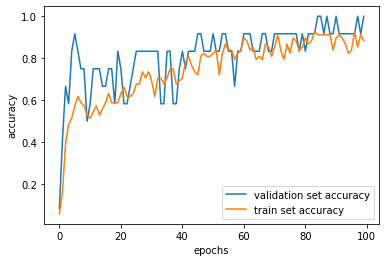

In [12]:
xvals=range(epochs) # Se grafica el accuracy respecto los epochs, vamos que la tendencia indican un buen aprendizaje 
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [13]:
loss, accuracy=model.evaluate(X_test_ae1, y_test) 
print(accuracy) # Se evalua el resultado del modelo respecto a los datos de prueba.

1/1 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.8500
0.8500000238418579


In [14]:
pred = model.predict(X_test_ae1) # Se predice los datos respecto a los datos de prueba

In [19]:
def results(y_pred,y_test):
    data = pd.read_csv("Data/data_final.txt",sep="\t")
    target = ['spect_b']
    target_values = data[target]['spect_b'].unique()
    target_numeric = np.arange(0,len(target_values))
    dic2_target = {target_numeric[i]:target_values[i] for i in range(len(target_numeric)) }

    prediction = [ np.argmax(i) for i in y_pred ]
    test = [ np.argmax(i) for i in y_test]

    prediction = np.where(prediction == 0,1,prediction)
    prediction = np.where(prediction == 1,7,prediction)
    prediction = np.where(prediction == 2,8,prediction)
    prediction = np.where(prediction == 3,17,prediction)
    prediction = np.where(prediction == 4,18,prediction)
    prediction = np.where(prediction == 5,19,prediction)

    test = np.where(test == 0,1,test)
    test = np.where(test == 1,7,test)
    test = np.where(test == 2,8,test)
    test = np.where(test == 3,17,test)
    test = np.where(test == 4,18,test)
    test = np.where(test == 5,19,test)

    res = pd.DataFrame({"Test values":test,"Prediction values":prediction})
    res['Prediction values'] = res['Prediction values'].apply(lambda x: dic2_target[x])
    res['Test values'] = res['Test values'].apply(lambda x: dic2_target[x])

    return res

In [20]:
result = results(pred,y_test)
result

,Test values,Prediction values
0,S,S
1,Ch,Ch
2,X,X
3,S,Sl
4,C,V
5,Ch,Ch
6,S,S
7,C,Ch
8,Ch,Ch
9,S,S


In [21]:
result.value_counts()

Test values  Prediction values
S            S                    9
Ch           Ch                   5
X            X                    2
C            Ch                   1
             V                    1
S            Sl                   1
Sl           Sl                   1
dtype: int64

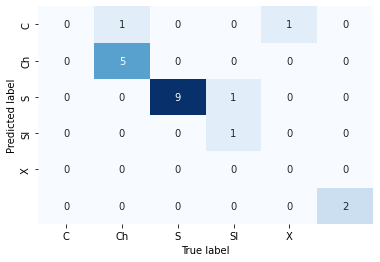

In [22]:
categorias=["C","Ch","S","Sl","X"]
cf_matrix = confusion_matrix(result["Test values"],result["Prediction values"])
sns.heatmap(cf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=categorias,yticklabels=categorias)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

### Modelo utilizando los datos sin el autoencoder

In [23]:
X_data = pd.read_csv("Data/X_data.csv").to_numpy() # Se obtiene los valores de las longitudes de onda.
y_data = pd.read_csv("Data/y_data.csv").to_numpy() # Se obtiene las categorias con valores transformados a one hot encode.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=500) # Realizamos un split de los datos a entrenamiento y prueba. Random state = 27
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 1000)
(80, 6)
(20, 1000)
(20, 6)


In [25]:
scaler = StandardScaler() # Se construye una funcion para escalar los datos predictores "X" tanto para training como testing utilizando un Standard Scaler.
X_train_scaled = scaler.fit_transform(X_train) # valor escalado de X_train
X_test_scaled = scaler.fit_transform(X_test) # valor escalado de X_test

0.8333333134651184 validation set accuracy
0.9558823704719543 training set accuracy


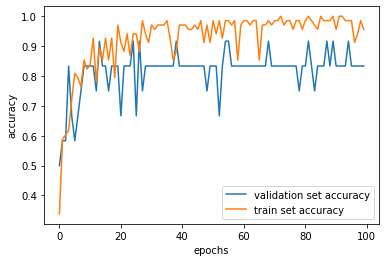

In [26]:
model = get_model(X_train_scaled[0].shape)
compile_model(model)
myhistory=model.fit(X_train_scaled,y_train,  epochs=100, batch_size=32, validation_split=0.15, verbose=0)
print(myhistory.history['val_accuracy'][-1], "validation set accuracy") # Se imprime el accuracy del modelo respecto al set de validacion
print(myhistory.history['accuracy'][-1], "training set accuracy") # Se imprime el accuracy del modelo respecto al set de entrenamiento

xvals=range(100) # Se grafica el accuracy respecto los epochs, vamos que la tendencia indican un buen aprendizaje 
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [27]:
loss, accuracy=model.evaluate(X_test_scaled, y_test) 
print(accuracy) # Se evalua el resultado del modelo respecto a los datos de prueba.

1/1 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9500
0.949999988079071


In [28]:
pred = model.predict(X_test_scaled) # Se predice los datos respecto a los datos de prueba
result = results(pred,y_test)
result

,Test values,Prediction values
0,S,S
1,Ch,Ch
2,X,X
3,S,S
4,C,C
5,Ch,Ch
6,S,S
7,C,Ch
8,Ch,Ch
9,S,S


In [29]:
result.value_counts()

Test values  Prediction values
S            S                    10
Ch           Ch                    5
X            X                     2
C            C                     1
             Ch                    1
Sl           Sl                    1
dtype: int64

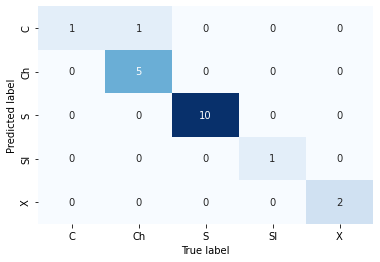

In [30]:
categorias=["C","Ch","S","Sl","X"]
cf_matrix = confusion_matrix(result["Test values"],result["Prediction values"])
sns.heatmap(cf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=categorias,yticklabels=categorias)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

Resultados:
* Se observa que el algoritmo de Redes neuronales logra clasificar de mejor forma cuando se hace sin el Autoencode, esto probablemente sea por que pasar de 1000 columnas a 100, se pierda bastante informacion importante.
* Es importante tener en cuenta que a pesar de que se perdio informacion en el autoencode, se obtuvo un porcentaje de asteroides clasificados de forma adecuada de 85% que es superior al margen que se buscaba en los objetivos del proyecto.
* Se puede observar que los asteroides con clasificacion C tienden a confundirse con los asteroides con clasificacion Ch. Esto es debido a que al graficar ambos, su espectro de reflectancia relativa es bastante similar respecto a las intensidades.
* Se logro obtener una prediccion del 95% de los datos utilizando los resultados sin el autoencode, indicando que la limpieza e ingenieria de caracteristicas fue efectiva para poder realizar el modelo.
* De los 160 asteroides que se iban a estudiar, unicamente se pudo estudiar 100 debido al sesgo en la clasificacion de datos, este sesgo impide estudiar de forma adecuada los asteroides con menos de 8 muestras por que probablemente al hacer el split de datos, la mayoria se concentren en un el set de testing o training en particular impidiendo evaluarlos o directamente entrenarlos.